# <center>Evolution of music taste: analysing popular music trends over time</center>

### <center>Project Proposal</center>

# Aims, objectives and background

## Introduction

Music is and has always been a major part of every culture, it can be traced back to the earliest parts of recorded human history and it has grown to be one of the largest entertainment and art industries in our current time. It comes without question that overall population's music taste changes as time passes, songs that are popular 30 or so years ago are no where near as popular now and they were very different sounding to the popular music now. I find the evolution of popular music to be really interesting and quite difficult to understand, there does not seem to be an exact science to predicting what songs people are drawn to and it is even more difficult to predict what music will be popular in the future. I don't believe the evolution of the more finer aspects of music have been widely researched or looked at in terms of trends and changes.

In this project I was inspired to try and analyse how music has changed over the recent years, I am really interested to see if any trends can be seen, how genres have changed and even the more intricate parts of the music has evolved over time.

## Aims and objectives

Things I would like to explore for this project:
<ul>
<li>Collecting popular music from recent years</li>
<li>collect the top songs for each year.</li>
<li>gather data in a csv with key elements of song in each column.</li>
<li>Analyse elements of popular songs each year and compare them.</li>
<li>What percent of songs are explicit?</li>
<li>How loud are the songs?</li>
<li>What is the average tempo?</li>
<li>Are songs getting happier or sadder?</li>
 <li>Are songs getting longer or shorter?</li>
<li>How much speech are in songs that year?</li>
<li>Give Basic visuals of this data to show trends</li>
 </ul>
 
Things I won't explore:

<ul>
<li>Artists popularity through time</li>
<li>Song name trends through time</li>
<li>'Danceability' of songs</li>
<li>Which genres are more popular that year?</li>
 </ul>

 My aims are to:
 <ol>
 <li>Choose where to gather the music data.</li>
 <li>Decide how much data to gather.</li>
 <li>Collect the data in a csv file.</li>
 <li>Clean and transform the data to fit my analysis.</li>
 <li>Use the data to analyse, find trends and visualise the data.</li>
 </ol>
  

## Data

I believe the best place to gather data would be from spotify. Spotify is one of the more popular music playing apps that I often use and have noticed they have Spotify made top 100 playlist for each year[1] from 1970 to the current year. This makes it easy for me to decide that I would like to gather each of the songs from these playlists. Spotify also has an API[2] that gives very useful audio features for its songs: track duration, explicitness, release Year of the track, popularity, danceability, energy, loudness, spoken words in a track, acousticness, instrumentalness, liveness, valence, tempo and genre. The api creates a csv with values for each of these features.

I decided to look on kaggle for any data sets that people have collected with this API. The most promising dataset I found was "Top Hits Spotify from 2000-2019"[3] The data set had collected tracks from each years Top 100 hits and has each tracks audio statistics provided from the spotify API that I mentioned before. That means it has 2000 tracks in total of data.

## Potential Flaws in data

This research definitely has its flaws and downfalls. For instance the audio features of the songs that cannot be simply labeled or calculated such as acousticeness, danceability, speechiness, liveness and valence are a part of the song data that has been gathered these audio features are 'calculated' by spotify's API. It is not stated how these values are 'calculated', however I suspect it has to do with machine learning or deep learning algorithms which will always have margins of error to them. Another flaw is the fact that these songs were gathered from spotify's self made playlists for top 100 songs of a certain year. Spotify does not seem to state exactly how these songs are selected for these years, it is likely the most played songs that are made in those years. The thing is a song might have been very popular in for instance the 2000's but was only popular for a little amount of time, this example song might not be included in the playlist as there are other songs that may not have been more popular at the time but had a greater longevity and are more popular now. It could also be that spotify 'hand selects' to some degree the songs for each playlist, meaning they could leave out very popular songs at the time that they simply didn't select or purposely left out as maybe the song might be problematic now. Another slight flaw is that each playlist has a few songs that were made in a previous year and this lead to not having an exact equal amount of songs for each release year.

## Ethical Considerations

I will not be looking at song, artist or album names in my research since they are copyrighted material and don't add to what trends I am trying to find in music over time.

I also won't be using spotify's logo in any part of the project as that too is copyrighted.

In [2]:
# Import libraries and modules
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# borrowed from example project
# Show all matplotlib graphs inline
%matplotlib inline

# Set all graphs to a seaborn style with a grey background grid which makes reading graphs easier
sns.set()

## Data Cleaning

Here I remove all unneeded parts of the data from the dataframe to reduce clutter. I also resort by year to keep the data in decent order.

In [3]:
#load the song data csv file that was downloaded from kaggle
songDF = pd.read_csv("./data/songs_normalize.csv")
#removing unwanted song properties
songDF.drop(['genre','mode','key','danceability','popularity','song','artist'],inplace=True, axis=1)

#sort by year
songDF = songDF.sort_values('year')
#reset index
songDF = songDF.reset_index(drop=True)

In [4]:
songDF

,duration_ms,explicit,year,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,215466,True,1998,0.445,-11.241,0.2910,0.33900,0.000000,0.1800,0.527,81.125
1,281466,False,1999,0.607,-8.458,0.0280,0.18900,0.000002,0.0882,0.213,102.030
2,216733,False,1999,0.811,-4.170,0.0810,0.00132,0.000142,0.1070,0.609,103.502
3,243533,False,1999,0.922,-4.842,0.0454,0.11600,0.000465,0.0710,0.686,84.110
4,276266,False,1999,0.491,-9.923,0.0770,0.24100,0.000046,0.0817,0.868,99.008
...,...,...,...,...,...,...,...,...,...,...,...
1995,359973,True,2019,0.498,-7.872,0.2720,0.11600,0.000045,0.2680,0.502,92.980
1996,215280,False,2019,0.762,-3.497,0.0395,0.19200,0.002440,0.0863,0.553,120.042
1997,197666,False,2020,0.900,-4.325,0.1800,0.01070,0.000502,0.5560,0.478,102.516
1998,214440,True,2020,0.834,-5.767,0.0474,0.04110,0.005990,0.1050,0.381,179.920


I know I would like to do some mathematical calculations with the explicit values of the each song. I wont be able to do so in their boolean state, so I am going to convert them from True and False to 1 and 0 respectively. Also I noticed that each year's spotify playlist seemed to have a little cross over to the year before and after the year the playlist claims to be from. This should even out for most of the years, but there is a few anomalies I need to fix. There is only one song from 1998 and three songs from 2020. These are both just out of the year range I will be working with, so I simply adjusted the 1998 to 1999 and the 2020's to 2019's. This should have a negligible effect on the analysis.

In [5]:
#Converting explicit column values from True/False to 1/0 for easier calculation work.
songDF['explicit'].replace({True:1,False:0}, inplace=True)

In [6]:
#Changing the one 1998 anomaly to 1999 and the three 2020 anomalies to 2019
songDF['year'].replace({1998:1999,2020:2019}, inplace=True)

In [7]:
#Changing the duration_ms from milliseconds to seconds
songDF['duration_ms'] = songDF['duration_ms']/1000

In [8]:
songDF.describe()

,duration_ms,explicit,year,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228.748125,0.275500,2009.493000,0.720366,-5.512435,0.103568,0.128955,0.015226,0.181216,0.551690,120.122557
std,39.136569,0.446878,5.856458,0.152745,1.933482,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113.000000,0.000000,1999.000000,0.054900,-20.514000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203.580000,0.000000,2004.000000,0.622000,-6.490250,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223.279500,0.000000,2010.000000,0.736000,-5.285000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248.133000,1.000000,2015.000000,0.839000,-4.167750,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484.146000,1.000000,2019.000000,0.999000,-0.276000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


I adapted this error checker from the example project we were given for this midterm project. Simply just checking if I have any missing data.

In [9]:
#Checking if for missing pieces of data
#Summarised data checker from example project
for column in songDF:
    num_missing = songDF[column].isna().sum()
    total_missing =+ num_missing
    if num_missing > 0:
        print(column, "has", num_missing, "pieces of missing (null, NA, NaN) data.")
if total_missing == 0:
    print("There is no pieces of missing data")

There is no pieces of missing data


## Analysing data trends

Also adapted from the example project. I just used a gradient of 21 colours for each of the years from orange to turqoise to give a past to future look to the graphs.

In [10]:
# Create a colour palette for each of the years
#Used https://coolors.co/gradient-palette/ff8800-00f3eb?number=20 to make the gradient
years_palette = sns.blend_palette(['#FF8800', '#F28D0C', '#E69318', '#D99823', '#CC9D2F', '#BFA33B', '#B3A847', '#A6AD52', '#99B35E', '#8CB86A', '#80BE76', '#73C381', '#66C88D', '#59CE99', '#4CD3A5', '#40D8B0', '#33DEBC', '#26E3C8', '#1AE8D4', '#0DEEDF','#00F3EB'], 21)

years_palette

[(1.0, 0.5333333333333333, 0.0),
 (0.9520184544405997, 0.5517877739331026, 0.044290657439446365),
 (0.9038062283737024, 0.5755478662053056, 0.0922722029988466),
 (0.8519800076893502, 0.5956939638600538, 0.13640907343329486),
 (0.8, 0.615686274509804, 0.1843137254901961),
 (0.7480968858131488, 0.639600153787005, 0.23229527104959632),
 (0.7038062283737024, 0.6580545943867743, 0.2765859284890426),
 (0.6519800076893503, 0.6780469050365244, 0.3207227989234909),
 (0.6, 0.7019607843137254, 0.3686274509803922),
 (0.5480968858131489, 0.7220299884659747, 0.4166089965397924),
 (0.49996155324875047, 0.7458669742406767, 0.4644367550941946),
 (0.45198000768935026, 0.7643214148404459, 0.5050365244136871),
 (0.40000000000000013, 0.7843137254901961, 0.5529411764705882),
 (0.34801999231064973, 0.8082276047673972, 0.6009227220299884),
 (0.2961937716262977, 0.8282199154171471, 0.6487504805843906),
 (0.24798154555940022, 0.8484429065743945, 0.692964244521338),
 (0.2, 0.8705882352941177, 0.7372549019607844),
 (0.1480968858131489, 0.8905805459438676, 0.7852364475201844),
 (0.09996155324875049, 0.9107266435986159, 0.8330642060745868),
 (0.04798154555940034, 0.9344867358708189, 0.877277970011534),
 (0.0, 0.9529411764705882, 0.9215686274509803)]

## Percentage of explicit songs over the years

So I would like to find the percentage of explicit songs for each of the years. So what I did was create an empty list to store the percentages and also a years list just to also have the years ready to plot. A for loop repeats as many times as there are years and create a new dataframe with only the year of the for loop and explicit data for each song that year. The explicit data is summed divided by how many songs there were then multiplied by 100 to get a percentage for that year and appends it to the list. The process repeats for every year until we have a full list. 

In [11]:
#create a list for percentage of explicit songs in each year ascending
explicitList = []
years = []
for i in range(1999,2020):
    explicitYear=songDF.loc[songDF['year']==i,['explicit']]
    explicitPercent = (explicitYear['explicit'].sum()/len(explicitYear['explicit']))*100
    explicitList.append(explicitPercent)
    years.append(i)

print(explicitList)

[23.076923076923077, 16.216216216216218, 21.296296296296298, 33.33333333333333, 23.711340206185564, 37.5, 27.884615384615387, 27.368421052631582, 23.404255319148938, 23.711340206185564, 27.380952380952383, 21.49532710280374, 25.252525252525253, 16.52173913043478, 22.47191011235955, 19.230769230769234, 29.292929292929294, 32.323232323232325, 33.33333333333333, 47.66355140186916, 42.391304347826086]


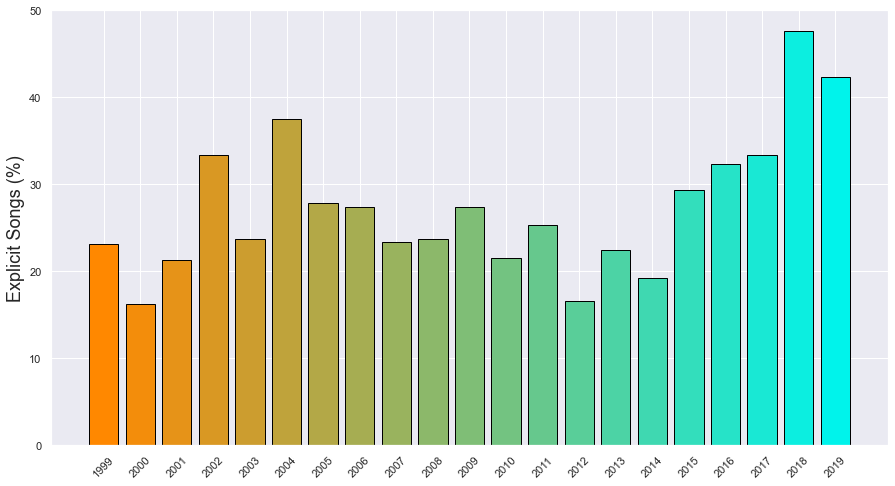

In [16]:
plt.gcf().set_size_inches(15, 8)
plt.bar(years, explicitList, color=years_palette, edgecolor = 'black')
plt.ylabel('Explicit Songs (%)', fontsize=18)
plt.xticks(years)
plt.xticks(rotation = 45)
plt.show()

Here we have a bar graph for each year and the percentage of explicit songs they had. From this data we can see in 1999 and 2000 it was rather low at 17ish percent, the explicicity of songs slightly increased until 2009 where it slightly decreased until 2013. The explicicity of songs the greatly increased to higher than ever before reaching about 48% in 2018 and about 43% in 2019. Overall the explicicity has shown a trend of some fluctuation then increase over those 11 years.

## Loudness of music over the years

I used a similar method to retrieve the data of the average loudness of each year. Obviously I instead calculated the mean instead of the percentage for the loudness of songs through the years. Spotify defines the loudness values as "The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db."[2]

In [17]:
#create a list for average loudness of songs in each year ascending
loudnessList = []
years = []
for i in range(1999,2020):
    loudnessYear=songDF.loc[songDF['year']==i,['loudness']]
    loudnessAvg = loudnessYear['loudness'].sum()/len(loudnessYear['loudness'])
    loudnessList.append(loudnessAvg)
    years.append(i)

print(loudnessList)

[-6.072820512820513, -6.201378378378379, -5.879212962962961, -5.471333333333333, -5.797020618556702, -5.233708333333333, -5.928894230769231, -5.673336842105263, -4.994904255319148, -5.183257731958763, -4.979785714285715, -4.862457943925234, -5.163777777777779, -4.827043478260871, -5.80205617977528, -5.431413461538461, -5.6480000000000015, -5.8782121212121226, -5.561846846846846, -5.863205607476635, -5.838630434782608]


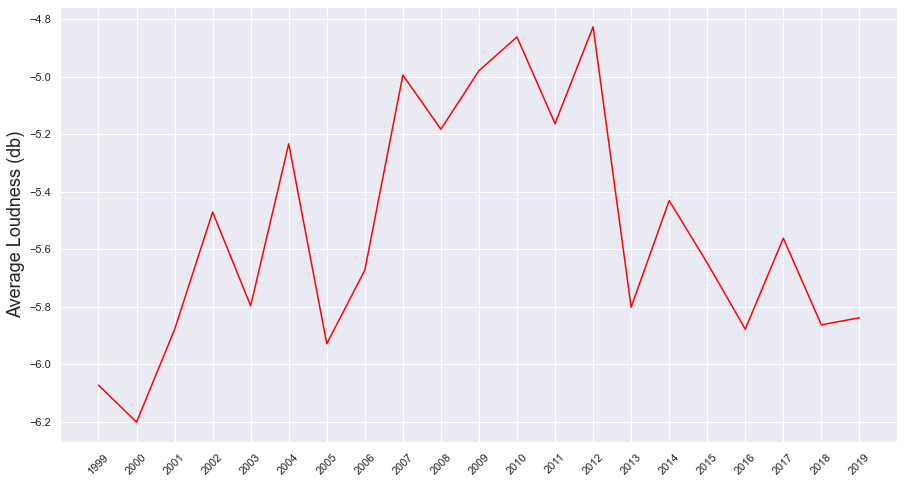

In [18]:
plt.gcf().set_size_inches(15, 8)
plt.plot(years, loudnessList, color='red')
plt.ylabel('Average Loudness (db)', fontsize=18)
plt.xticks(years)
plt.xticks(rotation = 45)
plt.show()

Here we can see the songs were rather quiet in 1999 and 2000, then after 2005 songs seemed to be at an all time high for those years until 2012 where then after it settled back to a similar loudness of the early 2000's songs.

## Average Tempo of music over the years

The method to gathering the average tempo data and plotting it is precisely the same process as the average loudness before.

In [19]:
#create a list for average tempo songs in each year ascending
tempoList = []
years = []
for i in range(1999,2020):
    tempoYear=songDF.loc[songDF['year']==i,['tempo']]
    tempoAvg = tempoYear['tempo'].sum()/len(tempoYear['tempo'])
    tempoList.append(tempoAvg)
    years.append(i)

print(tempoList)

[121.63884615384617, 112.92704054054055, 117.48707407407407, 113.28091111111112, 119.08140206185567, 114.76847916666667, 118.74568269230771, 114.58133684210527, 121.06696808510638, 126.25156701030927, 124.43936904761904, 120.92595327102805, 125.78055555555555, 120.94397391304346, 121.85501123595505, 121.9404519230769, 118.55082828282829, 120.75286868686868, 120.09881981981981, 119.22027102803736, 127.95918478260869]


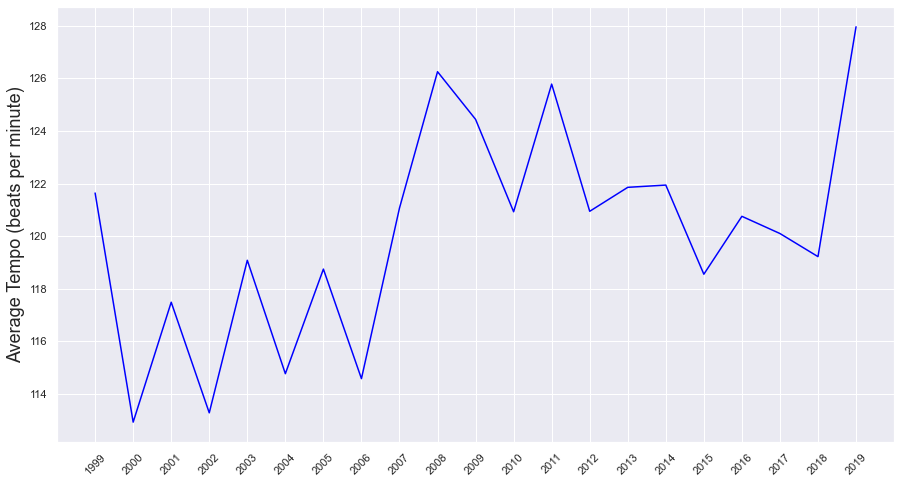

In [20]:
plt.gcf().set_size_inches(15, 8)
plt.plot(years, tempoList, color='blue')
plt.ylabel('Average Tempo (beats per minute)', fontsize=18)
plt.xticks(years)
plt.xticks(rotation = 45)
plt.show()

Tempo immediatley shot down from 1999 to 2000 and then fluctuated at rather low values of around 117bpm until 2006. There after it shot up significantly to 121 and then 126 at 2008, it then dropped little by little until 2019 where it reached an all time high of 128bpm.

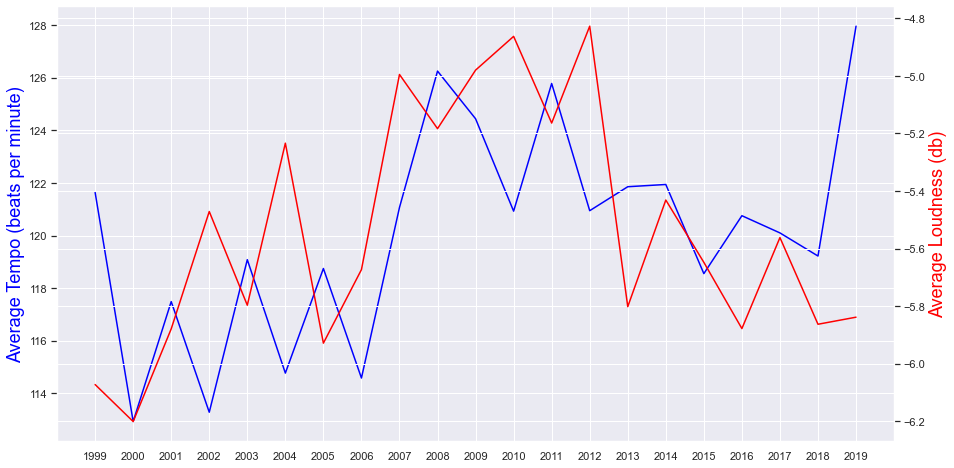

In [21]:
#learned double graph at https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()
ax1.plot(years, tempoList, color='blue')
ax2.plot(years, loudnessList, color='red')
ax1.set_ylabel('Average Tempo (beats per minute)', fontsize=18, color='blue')
ax2.set_ylabel('Average Loudness (db)', fontsize=18, color='red')
ax1.set_xticks(years)
plt.show()

I had noticed the average tempo and average loudness showed a very similar trend and thought it would be useful to plot them both on the same graph. This seems to show that there is some sort of correlation between the two throughout the years, although in 2019 the large tempo increase seperates itself from the trend of loudness decreasing at that point.

## Average Valence over the years in music

Spotify describes valence values as: "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."[2] This makes it quite interesting to find out how the happiness of music has possibly changed over the years. Although there is no definite way to calculate the happiness of the song, Spotify's algorithm could show some interesting things.

In [22]:
#create a list for percentage of explicit songs in each year ascending
valenceList = []
years = []
for i in range(1999,2020):
    valenceYear=songDF.loc[songDF['year']==i,['valence']]
    valenceAvg = valenceYear['valence'].sum()/len(valenceYear['valence'])
    valenceList.append(valenceAvg)
    years.append(i)

print(valenceList)

[0.572802564102564, 0.647972972972973, 0.6610407407407409, 0.5751555555555556, 0.6076319587628867, 0.6088812499999999, 0.5530769230769231, 0.6012736842105263, 0.5594989361702128, 0.5486855670103093, 0.5689309523809525, 0.5729102803738317, 0.5322585858585859, 0.5661243478260869, 0.48682808988764054, 0.5069134615384615, 0.4866979797979799, 0.4827636363636364, 0.4855531531531532, 0.467214953271028, 0.5356847826086956]


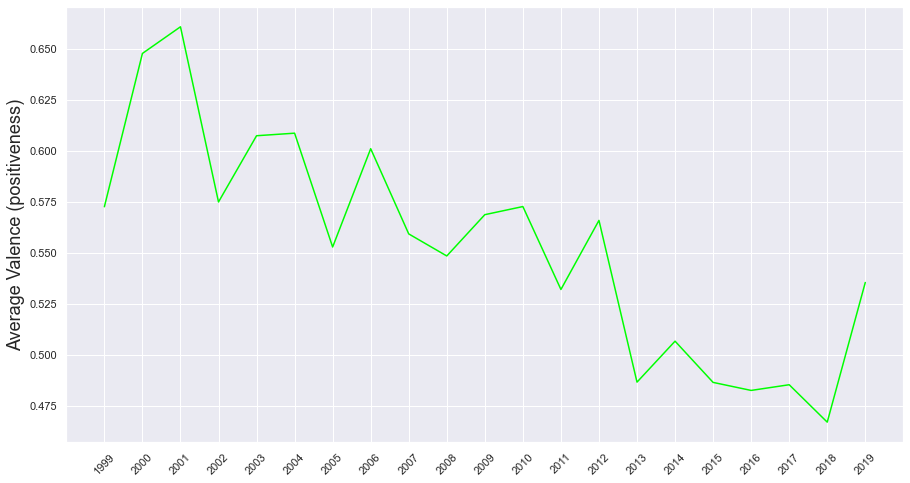

In [23]:
plt.gcf().set_size_inches(15, 8)
plt.plot(years, valenceList, color='lime')
plt.ylabel('Average Valence (positiveness)', fontsize=18)
plt.xticks(years)
plt.xticks(rotation = 45)
plt.show()

This is very interesting, you can very clearly see a downward trend of average music valence over the years, there is however an upward spike in 2019. This could mean there is more sad music being made and listened to and possibly less happy music. Maybe this also could correlate to societies valence? Just speculation.

## Song duration throughout the years in music

I thought it would be more informative to plot this data as a boxplot to also see the range of song durations through the years aswell as the means. Firstly I had to single out the song duration and year columns and make a new dataframe for this graph. Once that was done I could simply use the boxplot function giving the data as an argument to plot the graph. I took inspiration from the example project's boxplot and adpated it to my own data.

In [24]:
#Get only duration and year columns
songTimeDF=songDF[['duration_ms','year']]
songTimeDF.columns = ['Duration (Seconds)','Year']
songTimeDF

,Duration (Seconds),Year
0,215.466,1999
1,281.466,1999
2,216.733,1999
3,243.533,1999
4,276.266,1999
...,...,...
1995,359.973,2019
1996,215.280,2019
1997,197.666,2019
1998,214.440,2019


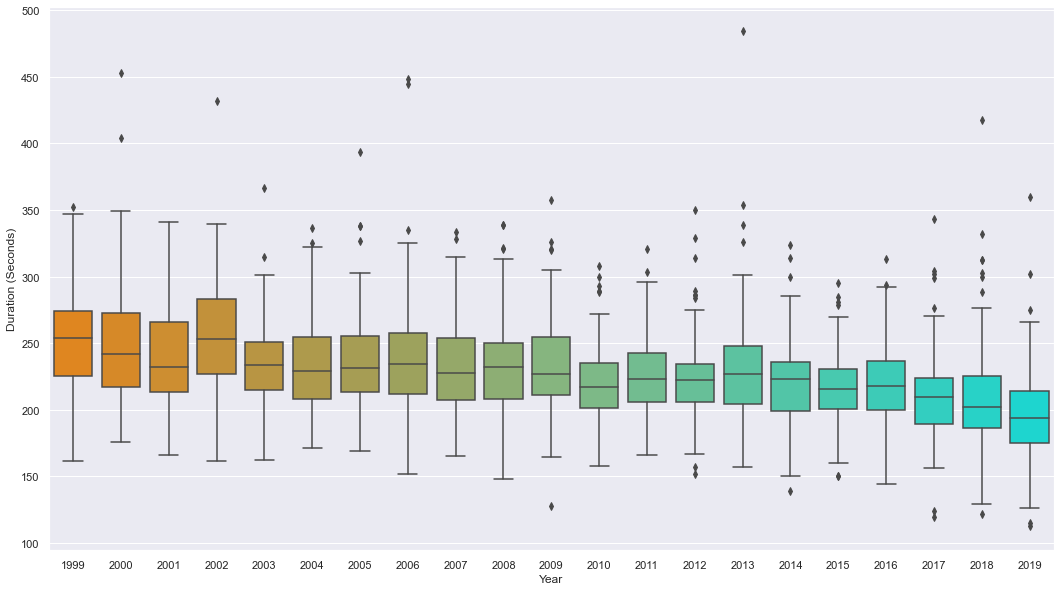

In [25]:
plt.gcf().set_size_inches(18, 10)
#Adapted from example project
ax = sns.boxplot(x='Year', y='Duration (Seconds)', data = songTimeDF, palette = years_palette)
plt.show()

This graph could not show a better trend of average song duration steadily decreasing as time passes. I find this extremely interesting We can see how since 1999 the mean duration of a song was about 255 seconds it slowly decreased an all time low about 190 second average in 2019. That is about a whole minute shaved off in average song duration!

## Average song 'speechiness' through the years of music

Spotify describes speechiness values as: "Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."[2] This is another case of not really a clear calculation made to get these values but rather spotify's own AI algorithms coming up with these values. Still should give some interesting things to look at.

In [21]:
#create a list for average speechiness of songs in each year ascending
speechinessList = []
years = []
for i in range(1999,2020):
    speechinessYear=songDF.loc[songDF['year']==i,['speechiness']]
    speechinessAvg = speechinessYear['speechiness'].sum()/len(speechinessYear['speechiness'])
    speechinessList.append(speechinessAvg)
    years.append(i)

print(speechinessList)

[0.07296153846153848, 0.07755675675675676, 0.10744537037037036, 0.12422, 0.11711340206185568, 0.12580208333333334, 0.12788557692307692, 0.1164442105263158, 0.10949680851063831, 0.08745979381443299, 0.08814285714285715, 0.09891495327102803, 0.09155555555555557, 0.07876956521739131, 0.086761797752809, 0.07270192307692307, 0.0861060606060606, 0.10547171717171716, 0.11434054054054053, 0.12151869158878506, 0.14279891304347825]


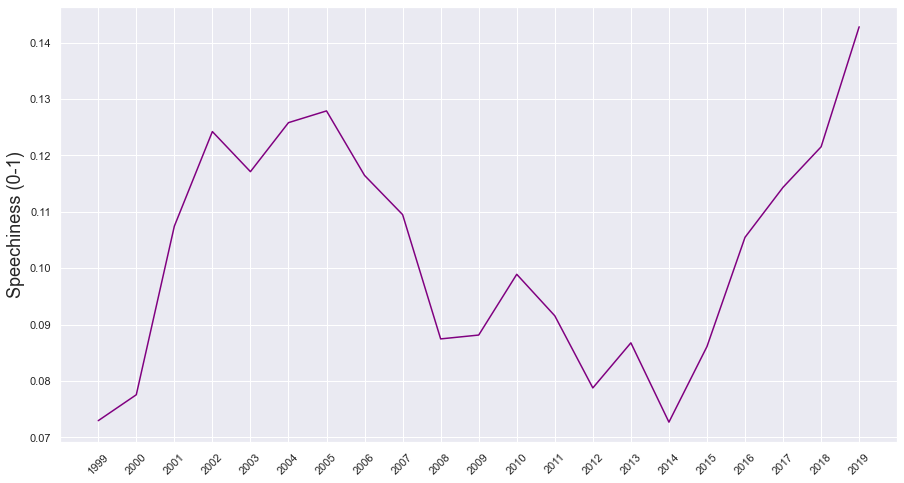

In [22]:
plt.gcf().set_size_inches(15, 8)
plt.plot(years, speechinessList, color='purple')
plt.ylabel('Speechiness (0-1)', fontsize=18)
plt.xticks(years)
plt.xticks(rotation = 45)
plt.show()

Seems like there was relatively little speech at 0.075 in 1999 and 2000 to then a sudden jump to 0.12 in the early 2000's. This steeply decreased all the way until 2014 to an also relatively little speech value of 0.075. However the was a very steep climb to 2019 at an all time high of 0.14.

# Conclusion

By analysing the data of the given spotify song audio properties, we were able to see very interesting trends in music evolution from 1999 to 2019. We can see that popular songs are becoming more explicit; possible becoming less happy; seem to be increasing in tempo and are also clearly becoming shorter. We were also able to see how loudness and speechiness have changed and fluctuated throughout the years.

I feel there could be some improvements such as bringing in more exact data rather than spotify's top hits for each year, if we could get the exact number of listens for each song and also maybe the demographic of the listeners, there could be more interesting topics to explore like how age is affecting this data.

# References and Resources

In [23]:
#Changing duration_ms from milliseconds to seconds
songDF['duration_ms'] = songDF['duration_ms']/1000

## References

[1] Spotify (2022, June 20). Spotify top hits of (year) playlists search[Online]. Available:https://open.spotify.com/search/Top%20hits%20of/playlists

[2] Spotify for developers web API (2022, June 20). Get Tracks' Audio Features [Online]. Available:https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

[3] Kaggle dataset (2022, June 20) Mark Koverha - Top Hits Spotify from 2000-2019.[Online].
Available:https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

## Resources I used

Replace column values https://www.adamsmith.haus/python/answers/how-to-replace-column-values-in-a-pandas-dataframe-in-python#:~:text=Access%20a%20specific%20pandas.,old%20values%20to%20new%20values.

Gradient of colour palettes https://coolors.co/gradient-palette/ff8800-00f3eb?number=20

pandas cheat sheet https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

pandas user guide https://pandas.pydata.org/docs/user_guide/index.html

provided example report https://www.coursera.org/learn/uol-cm2015-programming-with-data/supplement/N8vlX/example-report

google sheets to easily view the original csv https://docs.google.com/spreadsheets/u/0/ 

matplotlib plot types https://matplotlib.org/stable/plot_types/index.html

learned double graph at https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

learned how to multiple whole column https://stackoverflow.com/questions/33768122/python-pandas-dataframe-how-to-multiply-entire-column-with-a-scalar